# LSTM으로 예측하기

## 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 라이브러리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 전처리

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/15일치_데이터.csv', index_col = 0)
data

,date,EXT_RX_TRAFF_AVG
0,2021-03-01 00:05:00,60567
1,2021-03-01 00:10:00,56581
2,2021-03-01 00:15:00,54131
3,2021-03-01 00:20:00,51891
4,2021-03-01 00:25:00,50153
...,...,...
4172,2021-03-15 11:45:00,156100
4173,2021-03-15 11:50:00,151580
4174,2021-03-15 11:55:00,149227
4175,2021-03-15 12:00:00,152651


In [5]:
data.dtypes

date                object
EXT_RX_TRAFF_AVG     int64
dtype: object

In [7]:
# object 타입을 datetime64[ns] 타입으로 바꿈. 
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
data = data.sort_values(by = ['date'], axis = 0)
data

,date,EXT_RX_TRAFF_AVG
0,2021-03-01 00:05:00,60567
1,2021-03-01 00:10:00,56581
2,2021-03-01 00:15:00,54131
3,2021-03-01 00:20:00,51891
4,2021-03-01 00:25:00,50153
...,...,...
4172,2021-03-15 11:45:00,156100
4173,2021-03-15 11:50:00,151580
4174,2021-03-15 11:55:00,149227
4175,2021-03-15 12:00:00,152651


In [8]:
data['DATE_hour'] = data['date'].dt.strftime('%Y-%m-%d %H') # 시간까지 출력 
data

,date,EXT_RX_TRAFF_AVG,DATE_hour
0,2021-03-01 00:05:00,60567,2021-03-01 00
1,2021-03-01 00:10:00,56581,2021-03-01 00
2,2021-03-01 00:15:00,54131,2021-03-01 00
3,2021-03-01 00:20:00,51891,2021-03-01 00
4,2021-03-01 00:25:00,50153,2021-03-01 00
...,...,...,...
4172,2021-03-15 11:45:00,156100,2021-03-15 11
4173,2021-03-15 11:50:00,151580,2021-03-15 11
4174,2021-03-15 11:55:00,149227,2021-03-15 11
4175,2021-03-15 12:00:00,152651,2021-03-15 12


In [9]:
df = data.groupby(['DATE_hour']).mean() # 시간에 따른 평균
df

,EXT_RX_TRAFF_AVG
DATE_hour,
2021-03-01 00,49174.181818
2021-03-01 01,33670.500000
2021-03-01 02,23007.666667
2021-03-01 03,14958.583333
2021-03-01 04,8634.666667
...,...
2021-03-15 08,75467.416667
2021-03-15 09,110042.500000
2021-03-15 10,145602.750000


In [10]:
df.dtypes

EXT_RX_TRAFF_AVG    float64
dtype: object

In [11]:
df = df.astype(int) #형 변환

In [12]:
df = df.reset_index()

In [13]:
df.dtypes

DATE_hour           object
EXT_RX_TRAFF_AVG     int64
dtype: object

In [14]:
df['DATE_hour'] = pd.to_datetime(df['DATE_hour'])
df

,DATE_hour,EXT_RX_TRAFF_AVG
0,2021-03-01 00:00:00,49174
1,2021-03-01 01:00:00,33670
2,2021-03-01 02:00:00,23007
3,2021-03-01 03:00:00,14958
4,2021-03-01 04:00:00,8634
...,...,...
344,2021-03-15 08:00:00,75467
345,2021-03-15 09:00:00,110042
346,2021-03-15 10:00:00,145602
347,2021-03-15 11:00:00,157500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE_hour         349 non-null    datetime64[ns]
 1   EXT_RX_TRAFF_AVG  349 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


In [16]:
df = df.set_index('DATE_hour') # 인덱스로 만들기 
df

,EXT_RX_TRAFF_AVG
DATE_hour,
2021-03-01 00:00:00,49174
2021-03-01 01:00:00,33670
2021-03-01 02:00:00,23007
2021-03-01 03:00:00,14958
2021-03-01 04:00:00,8634
...,...
2021-03-15 08:00:00,75467
2021-03-15 09:00:00,110042
2021-03-15 10:00:00,145602


In [17]:
df.to_csv("15day_LSTM.csv")

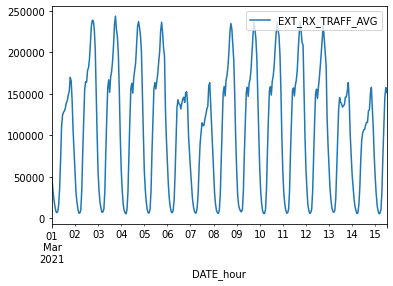

In [18]:
df.plot()

## 트레이닝셋 테스트셋 SPLIT

In [19]:
split_date = pd.Timestamp('03-10-2021')
# 2021-03-10까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.
split_date

Timestamp('2021-03-10 00:00:00')

In [20]:
train = df.loc[:split_date, ['EXT_RX_TRAFF_AVG']]
test = df.loc[split_date:, ['EXT_RX_TRAFF_AVG']]
# Feature는 EXT_RX_TRAFF_AVG 한 개
test

,EXT_RX_TRAFF_AVG
DATE_hour,
2021-03-10 00:00:00,58742
2021-03-10 01:00:00,31720
2021-03-10 02:00:00,17010
2021-03-10 03:00:00,8685
2021-03-10 04:00:00,5754
...,...
2021-03-15 08:00:00,75467
2021-03-15 09:00:00,110042
2021-03-15 10:00:00,145602


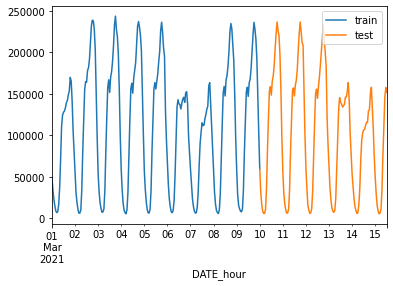

In [21]:
ax = train.plot()
test.plot(ax = ax)
plt.legend(['train', 'test'])

## 변수 Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.18429077],
       [0.11926621],
       [0.07454505],
       [0.04078714],
       [0.01426397],
       [0.00582554],
       [0.01099261],
       [0.04641555],
       [0.12995265],
       [0.27553233],
       [0.4403669 ],
       [0.49870614],
       [0.51331401],
       [0.52022161],
       [0.53642323],
       [0.56186853],
       [0.57256336],
       [0.60091514],
       [0.62067331],
       [0.6900471 ],
       [0.67161425],
       [0.5691494 ],
       [0.41939245],
       [0.31204573],
       [0.19658772],
       [0.10769482],
       [0.05792822],
       [0.02342797],
       [0.00348106],
       [0.00393402],
       [0.01919197],
       [0.1197653 ],
       [0.31329556],
       [0.46852994],
       [0.62810936],
       [0.6680535 ],
       [0.66609068],
       [0.72433765],
       [0.73938591],
       [0.78196391],
       [0.86570651],
       [0.95116448],
       [0.97971757],
       [0.975469  ],
       [0.93449313],
       [0.83235542],
       [0.60745367],
       [0.389

In [23]:
test_sc

array([[2.24419439e-01],
       [1.11087811e-01],
       [4.93933306e-02],
       [1.44778617e-02],
       [2.18510022e-03],
       [1.73214278e-03],
       [2.22200786e-02],
       [1.27062949e-01],
       [3.17179250e-01],
       [4.81405678e-01],
       [6.19788368e-01],
       [6.42864033e-01],
       [6.00395080e-01],
       [6.70607676e-01],
       [6.97395075e-01],
       [7.51070531e-01],
       [8.37283430e-01],
       [9.12331766e-01],
       [9.70650036e-01],
       [9.27732319e-01],
       [9.01498534e-01],
       [8.03806520e-01],
       [6.23407834e-01],
       [3.84535698e-01],
       [2.11589839e-01],
       [1.04381524e-01],
       [5.06473517e-02],
       [1.95358864e-02],
       [3.10779129e-03],
       [4.70153041e-03],
       [2.38431761e-02],
       [1.20415379e-01],
       [3.19737620e-01],
       [4.78457261e-01],
       [6.22371903e-01],
       [6.36988169e-01],
       [5.95852923e-01],
       [6.50186845e-01],
       [6.76621944e-01],
       [7.28980468e-01],


## Pandas Dataframe으로 변환

In [24]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index = test.index)
train_sc_df.head()

,Scaled
DATE_hour,
2021-03-01 00:00:00,0.184291
2021-03-01 01:00:00,0.119266
2021-03-01 02:00:00,0.074545
2021-03-01 03:00:00,0.040787
2021-03-01 04:00:00,0.014264


In [25]:
test_sc_df.head()

,Scaled
DATE_hour,
2021-03-10 00:00:00,0.224419
2021-03-10 01:00:00,0.111088
2021-03-10 02:00:00,0.049393
2021-03-10 03:00:00,0.014478
2021-03-10 04:00:00,0.002185


## pandas shift를 통해 Window 만들기

In [26]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

test_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
DATE_hour,,,,,,,,,,,,,
2021-03-10 00:00:00,0.224419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10 01:00:00,0.111088,0.224419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10 02:00:00,0.049393,0.111088,0.224419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10 03:00:00,0.014478,0.049393,0.111088,0.224419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10 04:00:00,0.002185,0.014478,0.049393,0.111088,0.224419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10 05:00:00,0.001732,0.002185,0.014478,0.049393,0.111088,0.224419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10 06:00:00,0.022220,0.001732,0.002185,0.014478,0.049393,0.111088,0.224419,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10 07:00:00,0.127063,0.022220,0.001732,0.002185,0.014478,0.049393,0.111088,0.224419,NaN,NaN,NaN,NaN,NaN
2021-03-10 08:00:00,0.317179,0.127063,0.022220,0.001732,0.002185,0.014478,0.049393,0.111088,0.224419,NaN,NaN,NaN,NaN


In [27]:
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
DATE_hour,,,,,,,,,,,,,
2021-03-01 00:00:00,0.184291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 01:00:00,0.119266,0.184291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 02:00:00,0.074545,0.119266,0.184291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 03:00:00,0.040787,0.074545,0.119266,0.184291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 04:00:00,0.014264,0.040787,0.074545,0.119266,0.184291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 05:00:00,0.005826,0.014264,0.040787,0.074545,0.119266,0.184291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 06:00:00,0.010993,0.005826,0.014264,0.040787,0.074545,0.119266,0.184291,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 07:00:00,0.046416,0.010993,0.005826,0.014264,0.040787,0.074545,0.119266,0.184291,NaN,NaN,NaN,NaN,NaN
2021-03-01 08:00:00,0.129953,0.046416,0.010993,0.005826,0.014264,0.040787,0.074545,0.119266,0.184291,NaN,NaN,NaN,NaN


## 트레이닝셋과 테스트셋 만들기

In [28]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1) # nan 제거 후 shift1 ~ shift12 
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [29]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
DATE_hour,,,,,,,,,,,,
2021-03-01 12:00:00,0.498706,0.440367,0.275532,0.129953,0.046416,0.010993,0.005826,0.014264,0.040787,0.074545,0.119266,0.184291
2021-03-01 13:00:00,0.513314,0.498706,0.440367,0.275532,0.129953,0.046416,0.010993,0.005826,0.014264,0.040787,0.074545,0.119266
2021-03-01 14:00:00,0.520222,0.513314,0.498706,0.440367,0.275532,0.129953,0.046416,0.010993,0.005826,0.014264,0.040787,0.074545
2021-03-01 15:00:00,0.536423,0.520222,0.513314,0.498706,0.440367,0.275532,0.129953,0.046416,0.010993,0.005826,0.014264,0.040787
2021-03-01 16:00:00,0.561869,0.536423,0.520222,0.513314,0.498706,0.440367,0.275532,0.129953,0.046416,0.010993,0.005826,0.014264


In [30]:
y_train.head()

,Scaled
DATE_hour,
2021-03-01 12:00:00,0.513314
2021-03-01 13:00:00,0.520222
2021-03-01 14:00:00,0.536423
2021-03-01 15:00:00,0.561869
2021-03-01 16:00:00,0.572563


In [31]:
X_test.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
DATE_hour,,,,,,,,,,,,
2021-03-10 12:00:00,0.642864,0.619788,0.481406,0.317179,0.127063,0.022220,0.001732,0.002185,0.014478,0.049393,0.111088,0.224419
2021-03-10 13:00:00,0.600395,0.642864,0.619788,0.481406,0.317179,0.127063,0.022220,0.001732,0.002185,0.014478,0.049393,0.111088
2021-03-10 14:00:00,0.670608,0.600395,0.642864,0.619788,0.481406,0.317179,0.127063,0.022220,0.001732,0.002185,0.014478,0.049393
2021-03-10 15:00:00,0.697395,0.670608,0.600395,0.642864,0.619788,0.481406,0.317179,0.127063,0.022220,0.001732,0.002185,0.014478
2021-03-10 16:00:00,0.751071,0.697395,0.670608,0.600395,0.642864,0.619788,0.481406,0.317179,0.127063,0.022220,0.001732,0.002185


In [32]:
y_test.head()

,Scaled
DATE_hour,
2021-03-10 12:00:00,0.600395
2021-03-10 13:00:00,0.670608
2021-03-10 14:00:00,0.697395
2021-03-10 15:00:00,0.751071
2021-03-10 16:00:00,0.837283


## 다시 ndarray로 변환하기



In [33]:
X_train = X_train.values
X_test = X_test.values

print(X_train.shape)
print(X_train) # timestep = 12 size = 205

(205, 12)
[[0.49870614 0.4403669  0.27553233 ... 0.07454505 0.11926621 0.18429077]
 [0.51331401 0.49870614 0.4403669  ... 0.04078714 0.07454505 0.11926621]
 [0.52022161 0.51331401 0.49870614 ... 0.01426397 0.04078714 0.07454505]
 ...
 [0.78223652 0.88278468 0.93392693 ... 0.59398657 0.64014629 0.61479745]
 [0.58884047 0.78223652 0.88278468 ... 0.66187147 0.59398657 0.64014629]
 [0.40075409 0.58884047 0.78223652 ... 0.68141994 0.66187147 0.59398657]]


In [34]:
y_train = y_train.values
y_test = y_test.values

print(y_train.shape)
print(y_train)

(205, 1)
[[0.51331401]
 [0.52022161]
 [0.53642323]
 [0.56186853]
 [0.57256336]
 [0.60091514]
 [0.62067331]
 [0.6900471 ]
 [0.67161425]
 [0.5691494 ]
 [0.41939245]
 [0.31204573]
 [0.19658772]
 [0.10769482]
 [0.05792822]
 [0.02342797]
 [0.00348106]
 [0.00393402]
 [0.01919197]
 [0.1197653 ]
 [0.31329556]
 [0.46852994]
 [0.62810936]
 [0.6680535 ]
 [0.66609068]
 [0.72433765]
 [0.73938591]
 [0.78196391]
 [0.86570651]
 [0.95116448]
 [0.97971757]
 [0.975469  ]
 [0.93449313]
 [0.83235542]
 [0.60745367]
 [0.38941757]
 [0.20334014]
 [0.11262703]
 [0.05614575]
 [0.02717325]
 [0.00786384]
 [0.00957921]
 [0.02436324]
 [0.11691754]
 [0.31631528]
 [0.4899196 ]
 [0.63958429]
 [0.67801856]
 [0.61415576]
 [0.691104  ]
 [0.7188812 ]
 [0.77108035]
 [0.85180743]
 [0.95569825]
 [1.        ]
 [0.93293294]
 [0.89736739]
 [0.8095272 ]
 [0.62539162]
 [0.39181657]
 [0.22389938]
 [0.12132129]
 [0.05170845]
 [0.018328  ]
 [0.00536838]
 [0.        ]
 [0.0213561 ]
 [0.11121783]
 [0.30404768]
 [0.47735423]
 [0.6338048

## 최종 트레이닝셋과 테스트셋의 X 만들기

In [35]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(205, 12, 1)
[[[0.49870614]
  [0.4403669 ]
  [0.27553233]
  ...
  [0.07454505]
  [0.11926621]
  [0.18429077]]

 [[0.51331401]
  [0.49870614]
  [0.4403669 ]
  ...
  [0.04078714]
  [0.07454505]
  [0.11926621]]

 [[0.52022161]
  [0.51331401]
  [0.49870614]
  ...
  [0.01426397]
  [0.04078714]
  [0.07454505]]

 ...

 [[0.78223652]
  [0.88278468]
  [0.93392693]
  ...
  [0.59398657]
  [0.64014629]
  [0.61479745]]

 [[0.58884047]
  [0.78223652]
  [0.88278468]
  ...
  [0.66187147]
  [0.59398657]
  [0.64014629]]

 [[0.40075409]
  [0.58884047]
  [0.78223652]
  ...
  [0.68141994]
  [0.66187147]
  [0.59398657]]]
[[0.51331401]
 [0.52022161]
 [0.53642323]
 [0.56186853]
 [0.57256336]
 [0.60091514]
 [0.62067331]
 [0.6900471 ]
 [0.67161425]
 [0.5691494 ]
 [0.41939245]
 [0.31204573]
 [0.19658772]
 [0.10769482]
 [0.05792822]
 [0.02342797]
 [0.00348106]
 [0.00393402]
 [0.01919197]
 [0.1197653 ]
 [0.31329556]
 [0.46852994]
 [0.62810936]
 [0.6680535 ]
 [0.66609068]
 [0.72433765]
 [0.73938591]
 [0.781

## LSTM 모델 만들기

In [36]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


## 모델 fitting

In [40]:
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 13/100
7/7 [==============================] - 0s 5ms/st

## 학습된 모델을 통해 테스트셋 Test 하기

In [41]:
print(X_test_t)

[[[0.64286403]
  [0.61978837]
  [0.48140568]
  ...
  [0.04939333]
  [0.11108781]
  [0.22441944]]

 [[0.60039508]
  [0.64286403]
  [0.61978837]
  ...
  [0.01447786]
  [0.04939333]
  [0.11108781]]

 [[0.67060768]
  [0.60039508]
  [0.64286403]
  ...
  [0.0021851 ]
  [0.01447786]
  [0.04939333]]

 ...

 [[0.43957422]
  [0.29456493]
  [0.11487923]
  ...
  [0.18533508]
  [0.2904296 ]
  [0.43086318]]

 [[0.58871465]
  [0.43957422]
  [0.29456493]
  ...
  [0.10388663]
  [0.18533508]
  [0.2904296 ]]

 [[0.63861546]
  [0.58871465]
  [0.43957422]
  ...
  [0.04297224]
  [0.10388663]
  [0.18533508]]]


In [53]:
y_pred = model.predict(X_test_t)
print(y_pred)

[[ 0.6255362 ]
 [ 0.66090095]
 [ 0.7118121 ]
 [ 0.7584768 ]
 [ 0.80843645]
 [ 0.8673365 ]
 [ 0.9058222 ]
 [ 0.90019333]
 [ 0.8179846 ]
 [ 0.72204775]
 [ 0.60497504]
 [ 0.46434706]
 [ 0.29060736]
 [ 0.11711323]
 [-0.00279965]
 [-0.0642065 ]
 [-0.07089238]
 [-0.03190321]
 [ 0.04149532]
 [ 0.13856941]
 [ 0.24753782]
 [ 0.35862812]
 [ 0.4583458 ]
 [ 0.5523037 ]
 [ 0.623586  ]
 [ 0.65653837]
 [ 0.6970298 ]
 [ 0.7329917 ]
 [ 0.7732473 ]
 [ 0.8344754 ]
 [ 0.8869017 ]
 [ 0.8962065 ]
 [ 0.82170266]
 [ 0.7196903 ]
 [ 0.62873626]
 [ 0.48293445]
 [ 0.307549  ]
 [ 0.1334145 ]
 [ 0.01059851]
 [-0.05893549]
 [-0.07087799]
 [-0.03519689]
 [ 0.03605531]
 [ 0.13140547]
 [ 0.2392462 ]
 [ 0.34954217]
 [ 0.4486583 ]
 [ 0.5402994 ]
 [ 0.61178493]
 [ 0.64285135]
 [ 0.682066  ]
 [ 0.72990036]
 [ 0.7885687 ]
 [ 0.84868187]
 [ 0.894271  ]
 [ 0.8984821 ]
 [ 0.81148046]
 [ 0.69242215]
 [ 0.57283413]
 [ 0.402139  ]
 [ 0.2400107 ]
 [ 0.09586338]
 [-0.0044559 ]
 [-0.05146714]
 [-0.04995206]
 [-0.00785854]
 [ 0.06477

In [54]:
y_pred_df.plot(ax=ax)
plt.show()

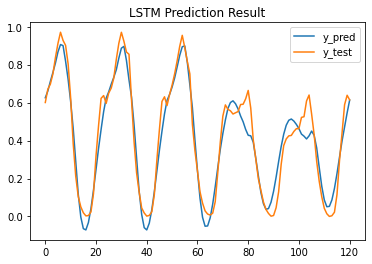

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('LSTM Prediction Result')
plt.plot(y_pred, label='y_pred')
plt.plot(y_test, label='y_test')
plt.legend()
plt.show()